In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import skimage
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage
from skimage import transform
from skimage import filters
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import skimage
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage
from skimage import filters
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam



In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "VGG_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# For VGG net, we will need colour images of minimum size  32×32  so i made it 64
#in assignment no longer

In [4]:
labels = ['1', '2','3','4','6']
img_size = 64
def get_data(data_dir):
    data = [] 
   # 1.1 Getting Started
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arry = imread(os.path.join(path,img))
                #img_array=rgb2gray(imread(os.path.join(path,img)))
                new_arry = skimage.transform.resize(img_arry, (img_size,img_size))
                data.append([new_arry, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/assignment3cv/training/training')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [6]:
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)

In [7]:
y=np.array(y)
y.shape

(887,)

In [8]:
x=np.array(x)
x.shape

(887, 64, 64, 3)

In [9]:

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.15, random_state=42)



In [10]:
x_train.shape

(753, 64, 64, 3)

# model

Import VGG net but without the top fully connected layers. We like to put our own classification layer on top. We will keep VGG net fix and just train our won top layers

In [11]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
#Add new output layer / acces last layer
vgg_model.layers[-1]

#3.1 Classification Network

As input to the model use images of size no larger
than 128×128 so i use 64
The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected so begin from layer 6  to take feature weight from  t to train my model 
and trainable false to make sure that the model not tunning

In [13]:
from tensorflow.keras.models import Model
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model.layers[6].output
# Flatten as before
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)

x=MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)


vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [14]:
print(vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [15]:
nClasses = 5
# Use Keras' handy utils
#binarize the label because vgg deal with binarize
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_valid_k = tensorflow.keras.utils.to_categorical(y_valid, num_classes=nClasses)

In [16]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(x_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(x_valid, y_valid_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/32
6/6 [==============================] - 16s 3s/step - loss: 26.8936 - accuracy: 0.1899 - val_loss: 2.0685 - val_accuracy: 0.2388
Epoch 2/32
6/6 [==============================] - 15s 3s/step - loss: 1.9391 - accuracy: 0.2457 - val_loss: 1.8957 - val_accuracy: 0.2463
Epoch 3/32
6/6 [==============================] - 15s 3s/step - loss: 1.7064 - accuracy: 0.3108 - val_loss: 1.8084 - val_accuracy: 0.3507
Epoch 4/32
6/6 [==============================] - 15s 3s/step - loss: 1.5477 - accuracy: 0.3652 - val_loss: 1.7805 - val_accuracy: 0.2910
Epoch 5/32
6/6 [==============================] - 15s 3s/step - loss: 1.4461 - accuracy: 0.3865 - val_loss: 1.7402 - val_accuracy: 0.3209
Epoch 6/32
6/6 [==============================] - 15s 3s/step - loss: 1.3698 - accuracy: 0.4236 - val_loss: 1.7314 - val_accuracy: 0.3060
Epoch 7/32
6/6 [==============================] - 15s 3s/step - loss: 1.2838 - accuracy: 0.4635 - val_loss: 1.7631 - val_accuracy: 0.3060
Epoch 8/32
6/6 [=================

In [17]:
vgg_model_transfer.save("/content/drive/MyDrive/assignment3cv/assincv32model3.1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assignment3cv/assincv32model3.1/assets


# Print your learning curves for training  and validation.

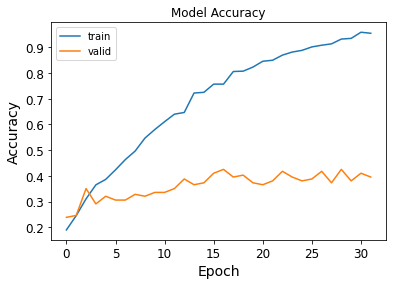

In [18]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

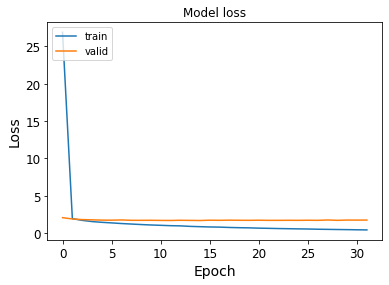

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# test

In [20]:
test= get_data('/content/drive/MyDrive/assignment3cv/testing/testing')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


#xtrain,xtestلازم نقس الshape
الي داخل للمودل

In [21]:
x_test=[]
y_test=[]
for i,j in test:
    x_test.append(i)
    y_test.append(j)

In [22]:
x_test=np.array(x_test)
y_test=np.array(y_test)

# Give the confusion matrix of your network on the training including validation and testing data sets

In [23]:
y_predict_prob = vgg_model_transfer.predict(x_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [24]:
y_predict = y_predict_prob.argmax(axis=-1)

In [25]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[ 9  7  0  2  2]
 [ 5  8  5  1  1]
 [ 2  1  9  5  3]
 [ 0  3  5  4  8]
 [ 0  2  5  2 11]]


In [26]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


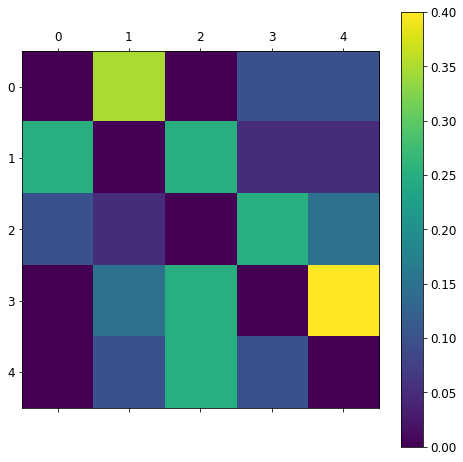

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

In [28]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3','class 4','class 6']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.56      0.45      0.50        20
     class 2       0.38      0.40      0.39        20
     class 3       0.38      0.45      0.41        20
     class 4       0.29      0.20      0.24        20
     class 6       0.44      0.55      0.49        20

    accuracy                           0.41       100
   macro avg       0.41      0.41      0.40       100
weighted avg       0.41      0.41      0.40       100



model less overfit give .41 on test data

#predict on train

In [29]:
y_predictrain_prob = vgg_model_transfer.predict(x_train)

In [30]:
y_predicttrain = y_predictrain_prob .argmax(axis=-1)

In [31]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_predicttrain)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[153   4   1   0   1]
 [  2 139   2   0   1]
 [  0   3 152   0   2]
 [  0   2   5 137   3]
 [  0   1   2   1 142]]


In [32]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3','class 4','class 6']
print(classification_report(y_train, y_predicttrain))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       159
           1       0.93      0.97      0.95       144
           2       0.94      0.97      0.95       157
           3       0.99      0.93      0.96       147
           4       0.95      0.97      0.96       146

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



In [33]:
y_predictvalid_prob = vgg_model_transfer.predict(x_valid)
y_predictvalid = y_predictvalid_prob .argmax(axis=-1)

In [34]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3','class 4','class 6']
print(classification_report(y_valid, y_predictvalid))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.42      0.36      0.39        36
           2       0.22      0.30      0.25        23
           3       0.26      0.20      0.23        30
           4       0.50      0.62      0.56        24

    accuracy                           0.40       134
   macro avg       0.41      0.41      0.41       134
weighted avg       0.40      0.40      0.39       134



Model give 96 on train  epochs  show that the model overfit  because it give .41 on test  and .40 on valid 
and loss from .4 to 1.7 

# 3.2 Basic Transfer Learning: Regression Network
the same network but use 1 in the last layer instead of 5 because it regression problem  use leaky relu Leaky ReLU is a type of activation function which comes across many machine learning blogs every now and then. It is suggested that it is an improvement of traditional ReLU and that it should be used more often.



In [35]:
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model.layers[6].output
# Flatten as before
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation=keras.layers.LeakyReLU(alpha=0.3))(x)

from tensorflow.keras.models import Model
vgg_model_transfer2 = Model(inputs=vgg_model.input, outputs=x)

In [36]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
#vgg_model_transfer.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
vgg_model_transfer2.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
print(vgg_model_transfer2.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [38]:
historyregression = vgg_model_transfer2.fit(x_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(x_valid, y_valid))

Epoch 1/32
6/6 [==============================] - 16s 3s/step - loss: 10539.8369 - mean_squared_error: 10539.8369 - val_loss: 5.7634 - val_mean_squared_error: 5.7634
Epoch 2/32
6/6 [==============================] - 15s 3s/step - loss: 4.2545 - mean_squared_error: 4.2545 - val_loss: 3.0322 - val_mean_squared_error: 3.0322
Epoch 3/32
6/6 [==============================] - 15s 3s/step - loss: 2.9400 - mean_squared_error: 2.9400 - val_loss: 2.8532 - val_mean_squared_error: 2.8532
Epoch 4/32
6/6 [==============================] - 15s 3s/step - loss: 2.5559 - mean_squared_error: 2.5559 - val_loss: 2.5328 - val_mean_squared_error: 2.5328
Epoch 5/32
6/6 [==============================] - 15s 3s/step - loss: 2.3906 - mean_squared_error: 2.3906 - val_loss: 2.2410 - val_mean_squared_error: 2.2410
Epoch 6/32
6/6 [==============================] - 15s 3s/step - loss: 2.2009 - mean_squared_error: 2.2009 - val_loss: 2.0924 - val_mean_squared_error: 2.0924
Epoch 7/32
6/6 [============================

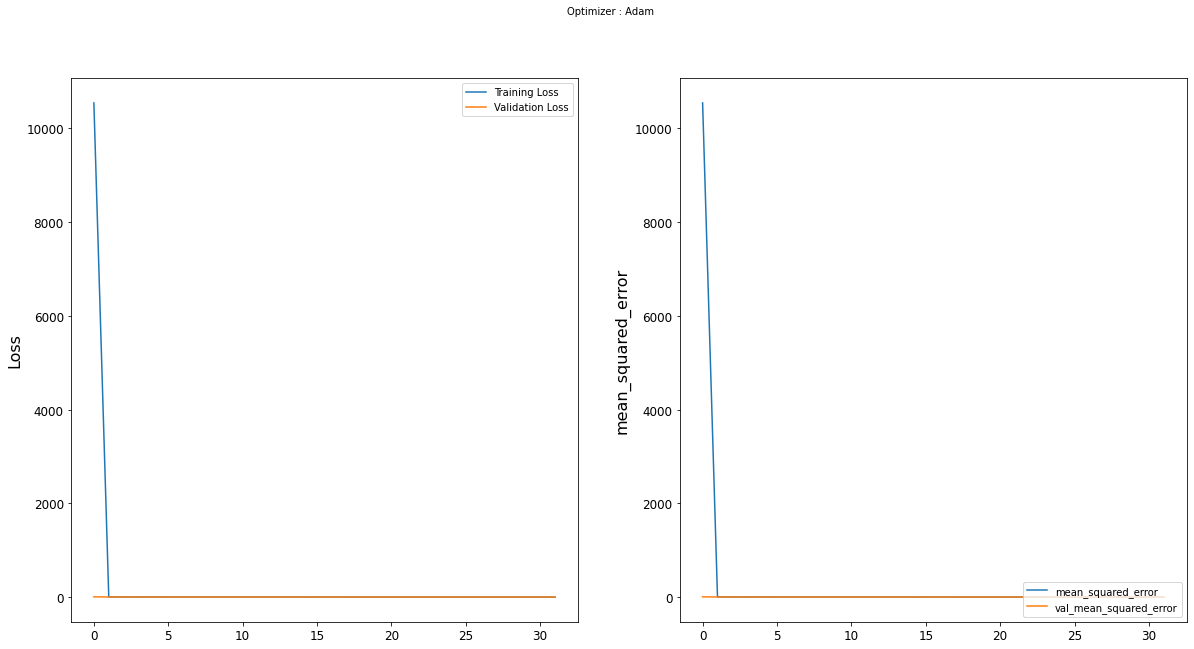

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(historyregression.history['loss'], label='Training Loss')
plt.plot(historyregression.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('mean_squared_error', fontsize=16)
plt.plot(historyregression.history['mean_squared_error'], label='mean_squared_error')
plt.plot(historyregression.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.legend(loc='lower right')
plt.show()

In [40]:
y_predict_prob2 =vgg_model_transfer2.predict(x_test)


In [ ]:
#y_predict_prob2

In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict_prob2)

1.0290772293694317

In [42]:

   """
   buid threshold to make classfication report convert to int  to get classes label loop tobegin from previos then move convert all to int then compare
   pred=[]
for i  in range(0,len(y_predict_prob2)):

   if int( y_predict_prob2[i] )==0 :
      labels= 1
   elif int(y_predict_prob2[i]) ==1 :
      labels= 2
   elif int(y_predict_prob2[i]) ==2 :
      labels= 3
   elif int( y_predict_prob2[i]) ==3 :
      labels= 4
   else:
      labels= 6
   pred.append( labels)
   
   """

The round() function returns a floating point number that is a rounded version of the specified number, with the specified number of decimals.

The default number of decimals is 0, meaning that the function will return the nearest integer.



In [141]:
y_predict_prob2te =vgg_model_transfer2.predict(x_test)

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.round(y_predict_prob2te)))

              precision    recall  f1-score   support

         0.0       0.40      0.20      0.27        20
         1.0       0.22      0.25      0.23        20
         2.0       0.24      0.45      0.31        20
         3.0       0.45      0.45      0.45        20
         4.0       0.50      0.20      0.29        20
         5.0       0.00      0.00      0.00         0

    accuracy                           0.31       100
   macro avg       0.30      0.26      0.26       100
weighted avg       0.36      0.31      0.31       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:



conf_mx2 = confusion_matrix(y_test,  np.round(y_predict_prob2te))
print('Confusion matrix: \n{0}'.format(conf_mx2))

Confusion matrix: 
[[ 4  8  7  1  0  0]
 [ 3  5 10  2  0  0]
 [ 1  6  9  2  2  0]
 [ 0  3  6  9  2  0]
 [ 2  1  6  6  4  1]
 [ 0  0  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Saving figure VGGtransfer_confusion_matrix_errors


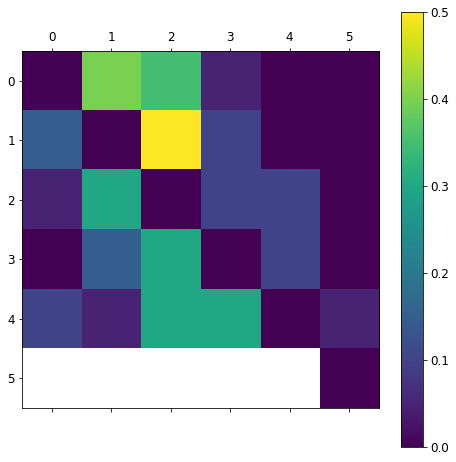

In [144]:
row_sums2 = conf_mx2.sum(axis=1, keepdims=True)
norm_conf_mx2 = conf_mx2 / row_sums2
np.fill_diagonal(norm_conf_mx2, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx2)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

#on train

In [47]:
y_predict_prob2t =vgg_model_transfer2.predict(x_train)

In [140]:
#y_predict_prob2t

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_train, np.round(y_predict_prob2t)))

              precision    recall  f1-score   support

         0.0       0.95      0.46      0.62       159
         1.0       0.43      0.49      0.46       144
         2.0       0.46      0.57      0.51       157
         3.0       0.47      0.69      0.55       147
         4.0       0.74      0.50      0.60       146
         5.0       0.00      0.00      0.00         0

    accuracy                           0.54       753
   macro avg       0.51      0.45      0.46       753
weighted avg       0.61      0.54      0.55       753



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Regression model give .5 loss and error on the train on the final epochs 
then it give 1.8 eror on vaidate whivh show less improving ,
give accuscy o .31 on test data and .54 on the train data 

# 3.3 Discussion 

Model give on size 64 Model give .96 on train  epochs  show that the model overfit  because it give .41 on test  and .40 on valid 
and loss from .4 to 1.7 


Regression model give .5 loss and error on the train on the final epochs 
then it give 1.8 eror on vaidate whivh show less improving ,
give accuscy o .33 on test data and .30 on the train data






>>>classfication is  and higher accuracy .42 on  with less loss in the final epochs 
higher accuracy .42 on test data
so this problem  is suitable to classfication 

###############
model in 3.1  when use imge with size 32 classfication is overfit because on traning data the last epohs get .89 % , but on validation .37% which show that the model overfit and loss icrease on validation 
but on regression loss on validation increse littel from training

but acrroding to f1score its better on classfication .34 and .26 on regression 



# 4.1 Regularization
Regularization and data augmentation are common strategies to deal with small datasets.


 Regularization Batch Normalization, Dropout

# A3.1_


In [80]:
from tensorflow.keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Dropout
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model.layers[6].output






x= BatchNormalization()(x)

# Flatten as before
x= Conv2D(128,(3,3),activation='relu',padding='same')(x)


x = MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(5, activation='softmax')(x)


vgg_model_transferpatch = Model(inputs=vgg_model.input, outputs=x)

In [81]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transferpatch.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


historyatch= vgg_model_transferpatch.fit(x_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(x_valid, y_valid_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/32
6/6 [==============================] - 17s 3s/step - loss: 2.1944 - accuracy: 0.1979 - val_loss: 4.6388 - val_accuracy: 0.2090
Epoch 2/32
6/6 [==============================] - 16s 3s/step - loss: 1.9295 - accuracy: 0.2311 - val_loss: 3.5632 - val_accuracy: 0.2015
Epoch 3/32
6/6 [==============================] - 17s 3s/step - loss: 1.9012 - accuracy: 0.2244 - val_loss: 2.9039 - val_accuracy: 0.2388
Epoch 4/32
6/6 [==============================] - 17s 3s/step - loss: 1.8375 - accuracy: 0.2470 - val_loss: 2.5569 - val_accuracy: 0.2090
Epoch 5/32
6/6 [==============================] - 17s 3s/step - loss: 1.7775 - accuracy: 0.2789 - val_loss: 2.4527 - val_accuracy: 0.2090
Epoch 6/32
6/6 [==============================] - 17s 3s/step - loss: 1.7290 - accuracy: 0.2656 - val_loss: 2.1468 - val_accuracy: 0.1866
Epoch 7/32
6/6 [==============================] - 17s 3s/step - loss: 1.7119 - accuracy: 0.2643 - val_loss: 2.0430 - val_accuracy: 0.2015
Epoch 8/32
6/6 [==================

In [54]:
vgg_model_transferpatch.save("/content/drive/MyDrive/assignment3cv/vgg_model_transferpatch3.1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assignment3cv/vgg_model_transferpatch3.1/assets


#print your learning curves for training and validation 

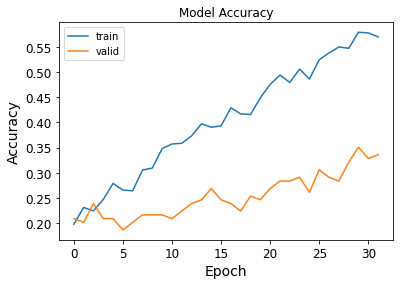

In [82]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in historyatch.history :
    k = 'accuracy'    

if 'acc' in historyatch.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyatch.history[k])
    plt.plot(historyatch.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

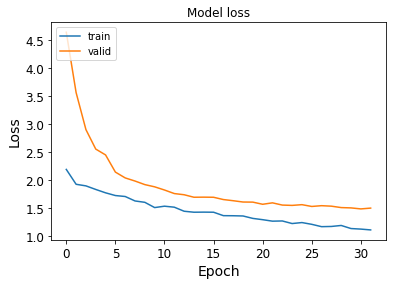

In [83]:
plt.plot(historyatch.history['loss'])
plt.plot(historyatch.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [84]:
y_predictpatch_prob = vgg_model_transferpatch.predict(x_test)
y_predictpatch = y_predictpatch_prob.argmax(axis=-1)

#print the corresponding metrics for your
model

In [107]:
from sklearn.metrics import confusion_matrix

conf_mx3 = confusion_matrix(y_test, y_predictpatch )
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[12  2  2  2  2]
 [ 9  5  3  3  0]
 [ 3  5  4  4  4]
 [ 1  4  3  6  6]
 [ 2  4  3  6  5]]


Saving figure VGGtransfer_confusion_matrix_errors


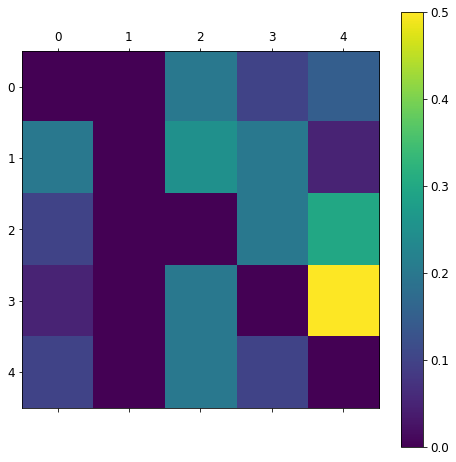

In [108]:
row_sums3 = conf_mx3.sum(axis=1, keepdims=True)
norm_conf_mx3 = conf_mx3 / row_sums3
np.fill_diagonal(norm_conf_mx3, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx3)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictpatch ))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       1.00      0.30      0.46        20
           2       0.32      0.40      0.36        20
           3       0.29      0.25      0.27        20
           4       0.38      0.60      0.46        20

    accuracy                           0.42       100
   macro avg       0.51      0.42      0.42       100
weighted avg       0.51      0.42      0.42       100



#on train and validate

In [87]:
y_predictpatch_probt = vgg_model_transferpatch.predict(x_train)
y_predictpatcht = y_predictpatch_probt.argmax(axis=-1)

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predictpatcht ))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       159
           1       0.75      0.49      0.59       144
           2       0.54      0.65      0.59       157
           3       0.66      0.67      0.66       147
           4       0.61      0.74      0.67       146

    accuracy                           0.66       753
   macro avg       0.67      0.66      0.66       753
weighted avg       0.67      0.66      0.66       753



In [89]:
y_predictpatch_probv = vgg_model_transferpatch.predict(x_valid)
y_predictpatchv= y_predictpatch_probv.argmax(axis=-1)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predictpatchv ))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        21
           1       0.50      0.25      0.33        36
           2       0.22      0.39      0.28        23
           3       0.27      0.23      0.25        30
           4       0.29      0.42      0.34        24

    accuracy                           0.34       134
   macro avg       0.39      0.35      0.35       134
weighted avg       0.39      0.34      0.34       134



classfication problem the model get .56 accuracy on the train and .33 on the validation whih less overfit from the previous classfication above
improve on test
on test get .42 sannd f1score .42







https://keras.io/api/layers/regularizers/

https://analyticsindiamag.com/everything-you-should-know-about-dropouts-and-batchnormalization-in-cnn/

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# 5 Data Augmentation

# A3.1_

data augmentation consists in increasing your number of instances in your dataset by applying some transfromations. Let's say I want to classify images. If I apply a random rotation to every image in a data set

https://datascience.stackexchange.com/questions/85832/what-exactly-are-the-data-augmentation-experimental-keras-layers-doing


https://sayak.dev/tf.keras/data_augmentation/image/2020/05/10/augmemtation-recipes.html

https://sayak.dev/tf.keras/data_augmentation/image/2020/05/10/augmemtation-recipes.html

https://keras.io/guides/transfer_learning/

entire model using the Sequential API, you can now construct very flexible data augmentation pipelines using the newly introduced (although experimental at the time of writing this) image processing layers

In [91]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

In [92]:
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API 
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)   

# last layers output
x = vgg_model.layers[6].output
# Flatten as before





x=Conv2D(128,(3,3),activation='relu',padding='same')(x)

x=MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transferagmantation = Model(inputs=vgg_model.input, outputs=x)

In [93]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transferagmantation.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


historyaug = vgg_model_transferagmantation.fit(x_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(x_valid, y_valid_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/32
6/6 [==============================] - 16s 3s/step - loss: 30.2706 - accuracy: 0.1833 - val_loss: 2.6537 - val_accuracy: 0.1866
Epoch 2/32
6/6 [==============================] - 15s 3s/step - loss: 2.1586 - accuracy: 0.2311 - val_loss: 2.2193 - val_accuracy: 0.1866
Epoch 3/32
6/6 [==============================] - 15s 3s/step - loss: 1.8596 - accuracy: 0.2882 - val_loss: 2.0118 - val_accuracy: 0.1940
Epoch 4/32
6/6 [==============================] - 15s 3s/step - loss: 1.6607 - accuracy: 0.3440 - val_loss: 1.9661 - val_accuracy: 0.2313
Epoch 5/32
6/6 [==============================] - 15s 3s/step - loss: 1.5136 - accuracy: 0.3838 - val_loss: 1.8683 - val_accuracy: 0.2164
Epoch 6/32
6/6 [==============================] - 16s 3s/step - loss: 1.4058 - accuracy: 0.4329 - val_loss: 1.8317 - val_accuracy: 0.2313
Epoch 7/32
6/6 [==============================] - 15s 3s/step - loss: 1.3121 - accuracy: 0.4900 - val_loss: 1.8471 - val_accuracy: 0.2463
Epoch 8/32
6/6 [=================

In [ ]:
vgg_model_transferagmantation.save("/content/drive/MyDrive/assignment3cv/vggtransferagmantationmodel3.1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assignment3cv/vggtransferagmantationmodel3.1/assets


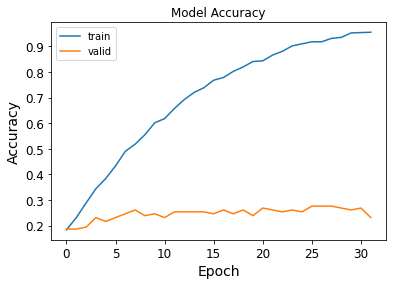

In [94]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in historyaug.history :
    k = 'accuracy'    

if 'acc' in historyaug.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyaug.history[k])
    plt.plot(historyaug.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

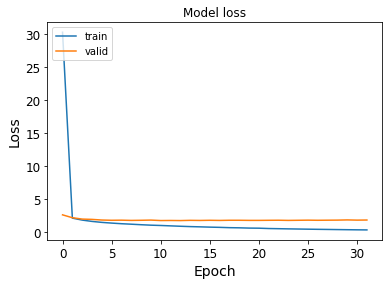

In [95]:
plt.plot(historyaug.history['loss'])
plt.plot(historyaug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

loss is decreaing efficient with data augmentation

In [96]:
y_predictrau_prob = vgg_model_transferagmantation.predict(x_test)
y_predictrau = y_predictrau_prob.argmax(axis=-1)

In [97]:
vgg_model_transferagmantation.evaluate(x_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [110]:
from sklearn.metrics import confusion_matrix

conf_mx4 = confusion_matrix(y_test, y_predictrau )
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[12  2  2  2  2]
 [ 9  5  3  3  0]
 [ 3  5  4  4  4]
 [ 1  4  3  6  6]
 [ 2  4  3  6  5]]


Saving figure VGGtransfer_confusion_matrix_errors


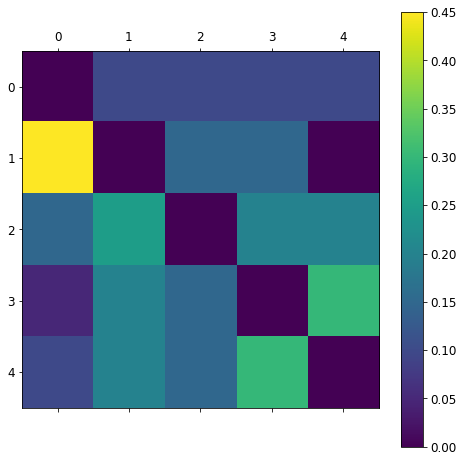

In [111]:
row_sums4 = conf_mx4.sum(axis=1, keepdims=True)
norm_conf_mx4 = conf_mx4 / row_sums4
np.fill_diagonal(norm_conf_mx4, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx4)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictrau ))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51        20
           1       0.25      0.25      0.25        20
           2       0.27      0.20      0.23        20
           3       0.29      0.30      0.29        20
           4       0.29      0.25      0.27        20

    accuracy                           0.32       100
   macro avg       0.31      0.32      0.31       100
weighted avg       0.31      0.32      0.31       100



the model with rerization only  get .32 on test data   never seen which show  not improve overfit

#train and valid

In [100]:
y_predictrau_probt = vgg_model_transferagmantation.predict(x_train)
y_predictraut = y_predictrau_probt.argmax(axis=-1)

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predictraut ))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.94      0.97      0.96       144
           2       0.95      0.94      0.95       157
           3       0.97      0.95      0.96       147
           4       0.97      0.99      0.98       146

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



In [102]:
y_predictrau_probv = vgg_model_transferagmantation.predict(x_valid)
y_predictrauv = y_predictrau_probv.argmax(axis=-1)

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predictrauv ))

              precision    recall  f1-score   support

           0       0.37      0.33      0.35        21
           1       0.37      0.28      0.32        36
           2       0.05      0.09      0.07        23
           3       0.19      0.20      0.19        30
           4       0.32      0.25      0.28        24

    accuracy                           0.23       134
   macro avg       0.26      0.23      0.24       134
weighted avg       0.27      0.23      0.24       134



 classfication with data augmentation the model get .95 on the train and .23 on validation in the final epochs
  and get .32 on the test data  but  regrization get .42 on the test data  

#augmentation with regrization

In [113]:
from tensorflow.keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Dropout
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
# last layers output
x = vgg_model.layers[6].output






x= BatchNormalization()(x)

# Flatten as before
x= Conv2D(128,(3,3),activation='relu',padding='same')(x)


x = MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(5, activation='softmax')(x)


vgg_model_transferpatch2 = Model(inputs=vgg_model.input, outputs=x)

In [114]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transferpatch2.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


historyn =vgg_model_transferpatch2.fit(x_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(x_valid, y_valid_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/32
6/6 [==============================] - 18s 3s/step - loss: 2.3062 - accuracy: 0.2125 - val_loss: 3.4483 - val_accuracy: 0.2239
Epoch 2/32
6/6 [==============================] - 17s 3s/step - loss: 1.9690 - accuracy: 0.2231 - val_loss: 2.9507 - val_accuracy: 0.3060
Epoch 3/32
6/6 [==============================] - 17s 3s/step - loss: 2.0169 - accuracy: 0.1979 - val_loss: 2.4977 - val_accuracy: 0.2239
Epoch 4/32
6/6 [==============================] - 17s 3s/step - loss: 1.8817 - accuracy: 0.2483 - val_loss: 2.2506 - val_accuracy: 0.1866
Epoch 5/32
6/6 [==============================] - 17s 3s/step - loss: 1.7663 - accuracy: 0.2776 - val_loss: 2.0953 - val_accuracy: 0.1940
Epoch 6/32
6/6 [==============================] - 17s 3s/step - loss: 1.7372 - accuracy: 0.2749 - val_loss: 2.0002 - val_accuracy: 0.2388
Epoch 7/32
6/6 [==============================] - 17s 3s/step - loss: 1.7177 - accuracy: 0.2749 - val_loss: 1.9847 - val_accuracy: 0.2388
Epoch 8/32
6/6 [==================

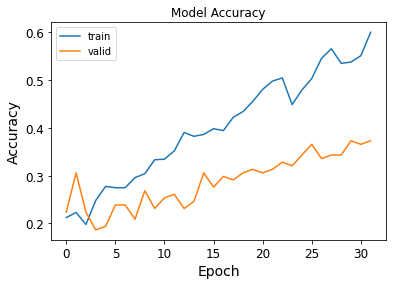

In [115]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in historyn.history :
    k = 'accuracy'    

if 'acc' in historyn.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyn.history[k])
    plt.plot(historyn.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

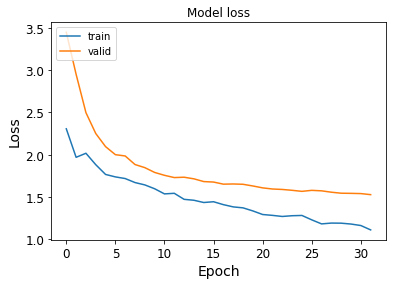

In [116]:
plt.plot(historyn.history['loss'])
plt.plot(historyn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [117]:
y_predictrau2_prob = vgg_model_transferpatch2.predict(x_test)
y_predictrau2= y_predictrau2_prob.argmax(axis=-1)

In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predictrau2 ))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.18      0.15      0.16        20
           2       0.36      0.40      0.38        20
           3       0.25      0.15      0.19        20
           4       0.34      0.50      0.41        20

    accuracy                           0.34       100
   macro avg       0.33      0.34      0.33       100
weighted avg       0.33      0.34      0.33       100



In [119]:
y_predictrau_probv2 =  vgg_model_transferpatch2.predict(x_valid)
y_predictrauv2= y_predictrau_probv2.argmax(axis=-1)

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_predictrauv2))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53        21
           1       0.52      0.33      0.41        36
           2       0.27      0.35      0.30        23
           3       0.30      0.27      0.28        30
           4       0.33      0.42      0.37        24

    accuracy                           0.37       134
   macro avg       0.38      0.39      0.38       134
weighted avg       0.39      0.37      0.37       134



# 5.1 Discussion

classfication problem the model get .56 accuracy on the train and .33 on the validation whih less overfit from the previous classfication above improve on test on test get .42 sannd f1score .42


 classfication with data augmentation the model get .95 on the train and .23 on validation in the final epochs
  and get .32 on the test data  but  regrization get .42 on the test data 




>>The model give better result with regrization with less overfit




>>The model give better performance with regrization with augmentation 
on validation data get .37 on validation   with f1 score .38 but on test .34  and f1 score .33


#another solution with data augmentation with datagenerator and regrization

In [123]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
datagen.fit(x_train)

In [126]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
vgg_model_transferpatch.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


historyau =  vgg_model_transferpatch.fit(datagen.flow(x_train, y_train_k), epochs=nEpochs, verbose=1, 
                                 validation_data=datagen.flow(x_valid, y_valid_k))

Epoch 1/32
24/24 [==============================] - 20s 793ms/step - loss: 1.6098 - accuracy: 0.3267 - val_loss: 1.6743 - val_accuracy: 0.2985
Epoch 2/32
24/24 [==============================] - 19s 783ms/step - loss: 1.5946 - accuracy: 0.3134 - val_loss: 1.5678 - val_accuracy: 0.2985
Epoch 3/32
24/24 [==============================] - 19s 779ms/step - loss: 1.5931 - accuracy: 0.3015 - val_loss: 1.5086 - val_accuracy: 0.4104
Epoch 4/32
24/24 [==============================] - 19s 775ms/step - loss: 1.6002 - accuracy: 0.3240 - val_loss: 1.4902 - val_accuracy: 0.3881
Epoch 5/32
24/24 [==============================] - 18s 769ms/step - loss: 1.5930 - accuracy: 0.3081 - val_loss: 1.5171 - val_accuracy: 0.3657
Epoch 6/32
24/24 [==============================] - 19s 774ms/step - loss: 1.5311 - accuracy: 0.3121 - val_loss: 1.5096 - val_accuracy: 0.2985
Epoch 7/32
24/24 [==============================] - 19s 777ms/step - loss: 1.5227 - accuracy: 0.3386 - val_loss: 1.4645 - val_accuracy: 0.3881

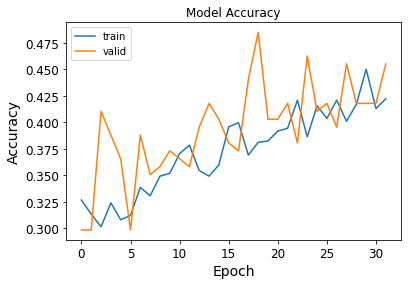

In [127]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in historyau.history :
    k = 'accuracy'    

if 'acc' in historyau.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyau.history[k])
    plt.plot(historyau.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

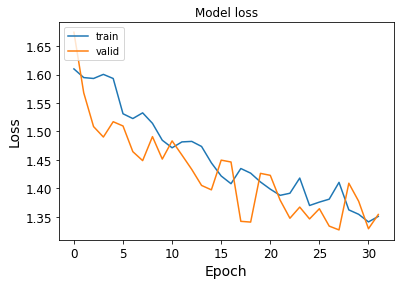

In [128]:
plt.plot(historyau.history['loss'])
plt.plot(historyau.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [129]:
y_predict_prob =  vgg_model_transferpatch.predict(x_valid)
y_predict = y_predict_prob.argmax(axis=-1)
y_valid=y_valid.astype(int)

In [130]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[14  4  3  0  0]
 [ 4 10 13  7  2]
 [ 1  3  9  4  6]
 [ 1  1  6 13  9]
 [ 0  0  6  4 14]]


In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.56      0.28      0.37        36
           2       0.24      0.39      0.30        23
           3       0.46      0.43      0.45        30
           4       0.45      0.58      0.51        24

    accuracy                           0.45       134
   macro avg       0.48      0.47      0.46       134
weighted avg       0.49      0.45      0.45       134



In [132]:
y_predict_probt =  vgg_model_transferpatch.predict(x_test)
y_predictt = y_predict_probt.argmax(axis=-1)
y_test=y_test.astype(int)

In [133]:
from sklearn.metrics import confusion_matrix

conf_mxt = confusion_matrix(y_test, y_predictt)
print('Confusion matrix: \n{0}'.format(conf_mxt))

Confusion matrix: 
[[ 9  3  7  0  1]
 [ 3  5  9  2  1]
 [ 2  2  6  4  6]
 [ 0  0  3  4 13]
 [ 1  0  3  2 14]]


In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictt))

              precision    recall  f1-score   support

           0       0.60      0.45      0.51        20
           1       0.50      0.25      0.33        20
           2       0.21      0.30      0.25        20
           3       0.33      0.20      0.25        20
           4       0.40      0.70      0.51        20

    accuracy                           0.38       100
   macro avg       0.41      0.38      0.37       100
weighted avg       0.41      0.38      0.37       100



In [135]:
y_predict_probtr =  vgg_model_transferpatch.predict(x_train)
y_predicttr = y_predict_probtr.argmax(axis=-1)
y_test=y_test.astype(int)

In [136]:
from sklearn.metrics import confusion_matrix

conf_mxtr = confusion_matrix(y_train, y_predicttr)
print('Confusion matrix: \n{0}'.format(conf_mxtr))

Confusion matrix: 
[[110  15  25   7   2]
 [ 10  73  27  20  14]
 [  3  15  92  19  28]
 [  2   5  17  84  39]
 [  1   3  10  12 120]]


In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predicttr))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       159
           1       0.66      0.51      0.57       144
           2       0.54      0.59      0.56       157
           3       0.59      0.57      0.58       147
           4       0.59      0.82      0.69       146

    accuracy                           0.64       753
   macro avg       0.65      0.64      0.63       753
weighted avg       0.65      0.64      0.64       753



the model with data generator augmention give with regrization 
.64 on train data ,.38 on test data ,on validation .45  but still less than with regrization alone get .42

#Discussion

classfication problem the model get .56 accuracy on the train and .33 on the validation whih less overfit from the previous classfication above improve on test on test get .42 sannd f1score .42


 classfication with data augmentation the model get .95 on the train and .23 on validation in the final epochs
  and get .32 on the test data  but  regrization get .42 on the test data 




>>The model give better result with regrization with less overfit




>>The model give better performance with regrization with augmentation 
on validation data get .37 on validation   with f1 score .38 but on test .34  and f1 score .33


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



the model with data generator augmention give with regrization 
.64 on train data ,.38 on test data ,on validation .45  but still less than with regrization alone get .42